# HW093: 大方EDA產品與顧客分析

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.future.infer_string = True
pd.options.mode.copy_on_write = True
plt.rcParams["figure.dpi"] = 300

In [24]:
df = pd.read_csv('tafeng5000.csv', index_col=0)

df

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,1/7/2001,235419,30-34,115,110105,4710198221113,1,25,29
1,2/13/2001,1550900,35-39,115,590312,4710735405006,1,103,119
2,2/26/2001,909228,>65,115,110411,4710088414120,2,48,66
3,11/18/2000,1380231,30-34,221,130401,4710057870391,1,71,81
4,12/1/2000,1695595,45-49,221,530110,4710186161209,2,152,198
...,...,...,...,...,...,...,...,...,...
4995,12/26/2000,1573879,55-59,221,500806,26333005345,1,97,132
4996,2/3/2001,2090818,35-39,221,130205,4717332008883,1,75,95
4997,11/15/2000,198127,30-34,115,760229,733879271232,1,209,299
4998,2/16/2001,1637649,45-49,221,760637,4712552007333,1,24,35


## Part 1

資料匯入，並進行資料清理

進行資料敘述統計。

In [25]:
df.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.404782e+06,285985.238200,4.457093e+12,1.352800,102.443600,120.803000
std,8.061332e+05,227810.005443,1.687643e+12,1.043528,202.563897,227.340672
min,4.947000e+03,100101.000000,2.000920e+07,1.000000,3.000000,4.000000
25%,9.597838e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.590248e+06,130102.000000,4.710395e+12,1.000000,62.000000,75.000000
75%,1.848335e+06,520437.000000,4.712731e+12,1.000000,110.000000,129.000000
max,2.000200e+07,780510.000000,9.557615e+12,30.000000,9428.000000,9980.000000


檢查每個欄位有多少屬於 NULL。

In [26]:
df.isnull().sum()

TRANSACTION_DT        0
CUSTOMER_ID           0
AGE_GROUP           149
PIN_CODE              0
PRODUCT_SUBCLASS      0
PRODUCT_ID            0
AMOUNT                0
ASSET                 0
SALES_PRICE           0
dtype: int64

In [27]:
df = df.dropna()
df.isnull().sum()

TRANSACTION_DT      0
CUSTOMER_ID         0
AGE_GROUP           0
PIN_CODE            0
PRODUCT_SUBCLASS    0
PRODUCT_ID          0
AMOUNT              0
ASSET               0
SALES_PRICE         0
dtype: int64

In [28]:
df.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
count,4.851000e+03,4851.000000,4.851000e+03,4851.000000,4851.000000,4851.000000
mean,1.384408e+06,286803.855081,4.456163e+12,1.350649,102.737168,121.181612
std,6.145518e+05,228134.802251,1.688929e+12,1.036702,204.853477,229.755808
min,7.795000e+03,100101.000000,2.000920e+07,1.000000,3.000000,4.000000
25%,9.509420e+05,110106.000000,4.710085e+12,1.000000,35.000000,42.000000
50%,1.584318e+06,130102.000000,4.710421e+12,1.000000,61.000000,75.000000
75%,1.849248e+06,520437.000000,4.712763e+12,1.000000,110.000000,129.000000
max,2.179605e+06,780510.000000,9.557615e+12,30.000000,9428.000000,9980.000000


沒有負數值。接著計算每個交易的銷售額。

In [29]:
df["SALES_FIGURE"] = df["SALES_PRICE"] * df["AMOUNT"]

## Part 2

請依月時間計算訂單數量趨勢圖，並以長條圖畫出。

In [30]:
df["TRANSACTION_DT"] = pd.to_datetime(df["TRANSACTION_DT"])

df

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,SALES_FIGURE
0,2001-01-07,235419,30-34,115,110105,4710198221113,1,25,29,29
1,2001-02-13,1550900,35-39,115,590312,4710735405006,1,103,119,119
2,2001-02-26,909228,>65,115,110411,4710088414120,2,48,66,132
3,2000-11-18,1380231,30-34,221,130401,4710057870391,1,71,81,81
4,2000-12-01,1695595,45-49,221,530110,4710186161209,2,152,198,396
...,...,...,...,...,...,...,...,...,...,...
4995,2000-12-26,1573879,55-59,221,500806,26333005345,1,97,132,132
4996,2001-02-03,2090818,35-39,221,130205,4717332008883,1,75,95,95
4997,2000-11-15,198127,30-34,115,760229,733879271232,1,209,299,299
4998,2001-02-16,1637649,45-49,221,760637,4712552007333,1,24,35,35


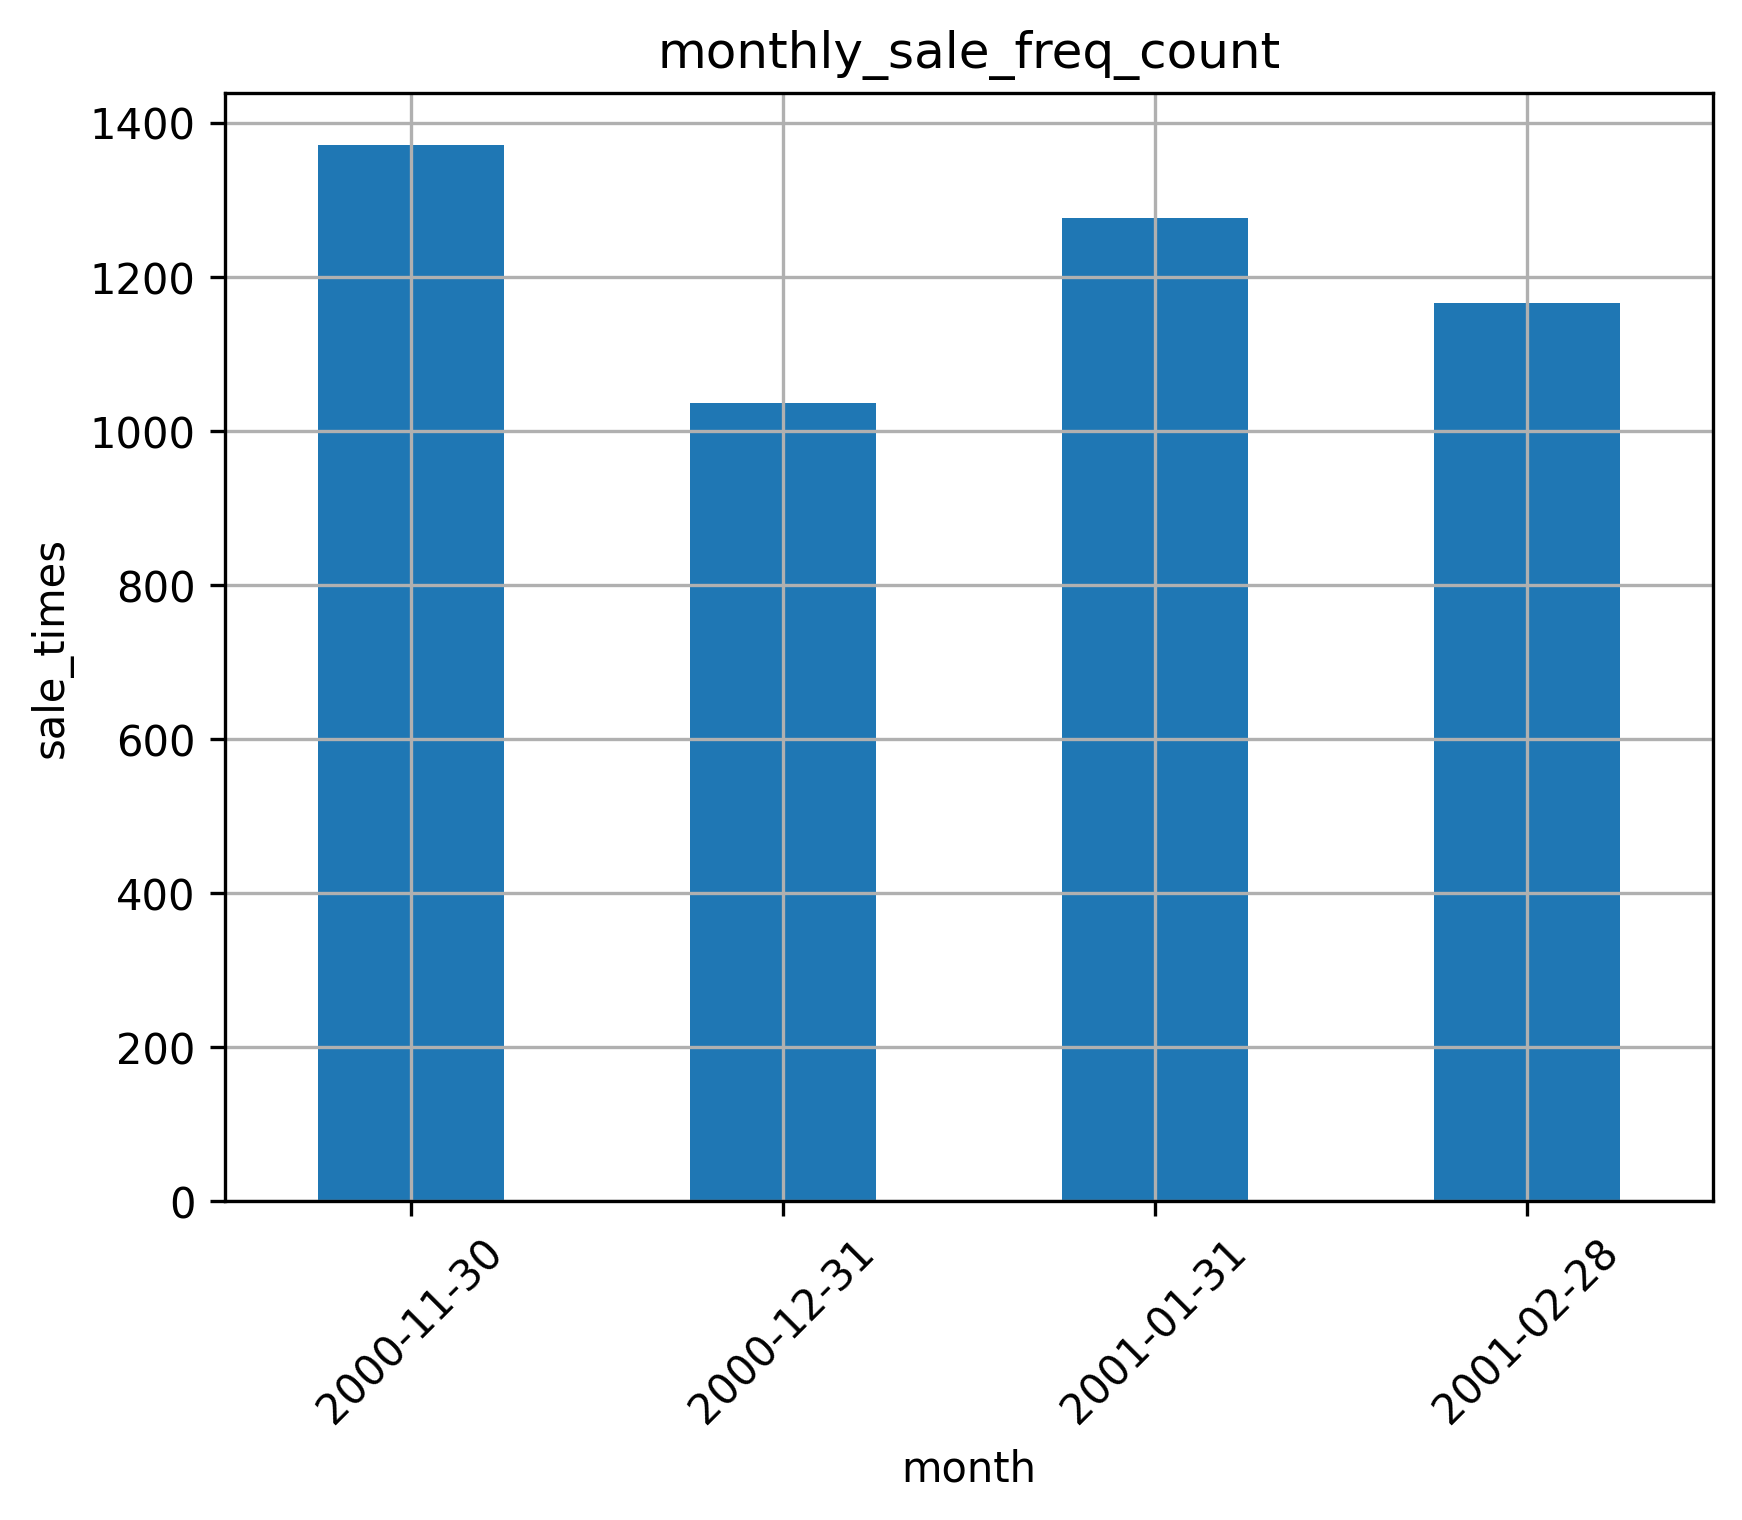

In [31]:
product_count_df = df.resample("ME", on="TRANSACTION_DT")["PRODUCT_ID"].count()

ax = plt.subplot()
product_count_df.plot(kind="bar", ylabel="sale_times", xlabel="month", ax=ax, grid=True)
ax.set_title("monthly_sale_freq_count")
ax.set_xticklabels(product_count_df.index.strftime("%Y-%m-%d"), rotation=45)

plt.show()

## Part 3

請依月時間計算銷售額趨勢圖，並以長條圖畫出。

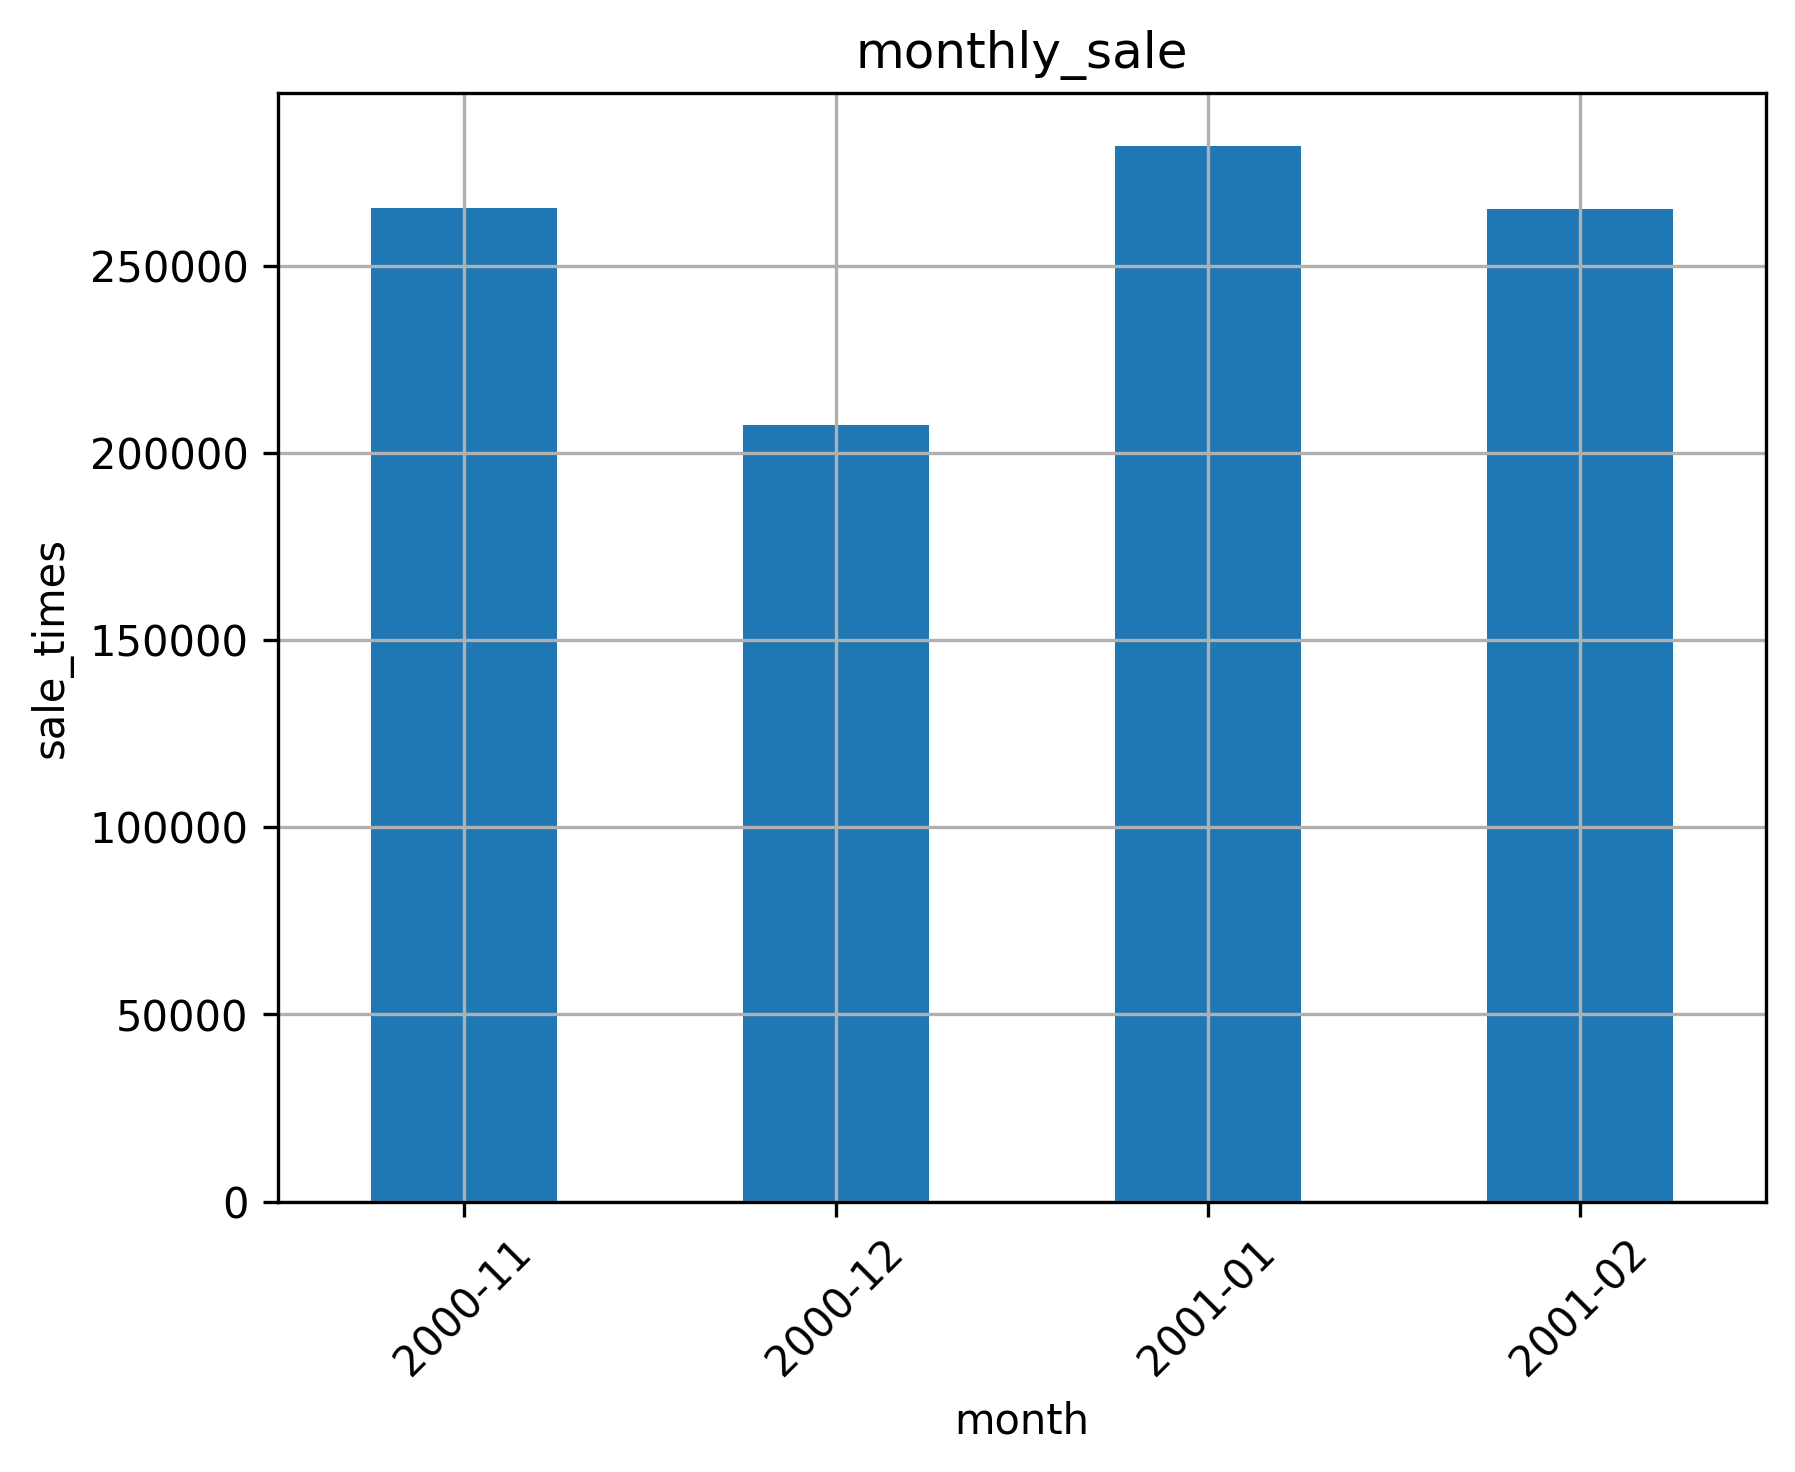

In [32]:
product_count_df = df.set_index("TRANSACTION_DT").resample("ME")["SALES_FIGURE"].sum()

ax = plt.subplot()
product_count_df.plot(kind="bar", ylabel="sale_times", xlabel="month", ax=ax, grid=True)
ax.set_title("monthly_sale")
ax.set_xticklabels([x.strftime("%Y-%m") for x in product_count_df.index], rotation=45)

plt.show()

## Part 4

請依月時間計算回頭客數量以及百分比，並畫出現有顧客以及回頭客的數量以及百分比。

當月有重複購買視為回頭客。

In [33]:
monthly_repeated_customer_df = (
    df.groupby([pd.Grouper(key="TRANSACTION_DT", freq="ME"), "CUSTOMER_ID"])
    .filter(lambda x: len(x) > 1)
    .resample("ME", on="TRANSACTION_DT")["CUSTOMER_ID"]
    .count()
)

monthly_repeated_customer_df

TRANSACTION_DT
2000-11-30    201
2000-12-31    121
2001-01-31    186
2001-02-28    131
Freq: ME, Name: CUSTOMER_ID, dtype: int64

In [34]:
monthly_unique_customers_df = df.resample("ME", on="TRANSACTION_DT")["CUSTOMER_ID"].nunique()

monthly_unique_customers_df

TRANSACTION_DT
2000-11-30    1266
2000-12-31     972
2001-01-31    1180
2001-02-28    1099
Freq: ME, Name: CUSTOMER_ID, dtype: int64

In [35]:
monthly_repeated_percentage_df = (monthly_repeated_customer_df / monthly_unique_customers_df).fillna(0)

monthly_repeated_percentage_df

TRANSACTION_DT
2000-11-30    0.158768
2000-12-31    0.124486
2001-01-31    0.157627
2001-02-28    0.119199
Freq: ME, Name: CUSTOMER_ID, dtype: float64

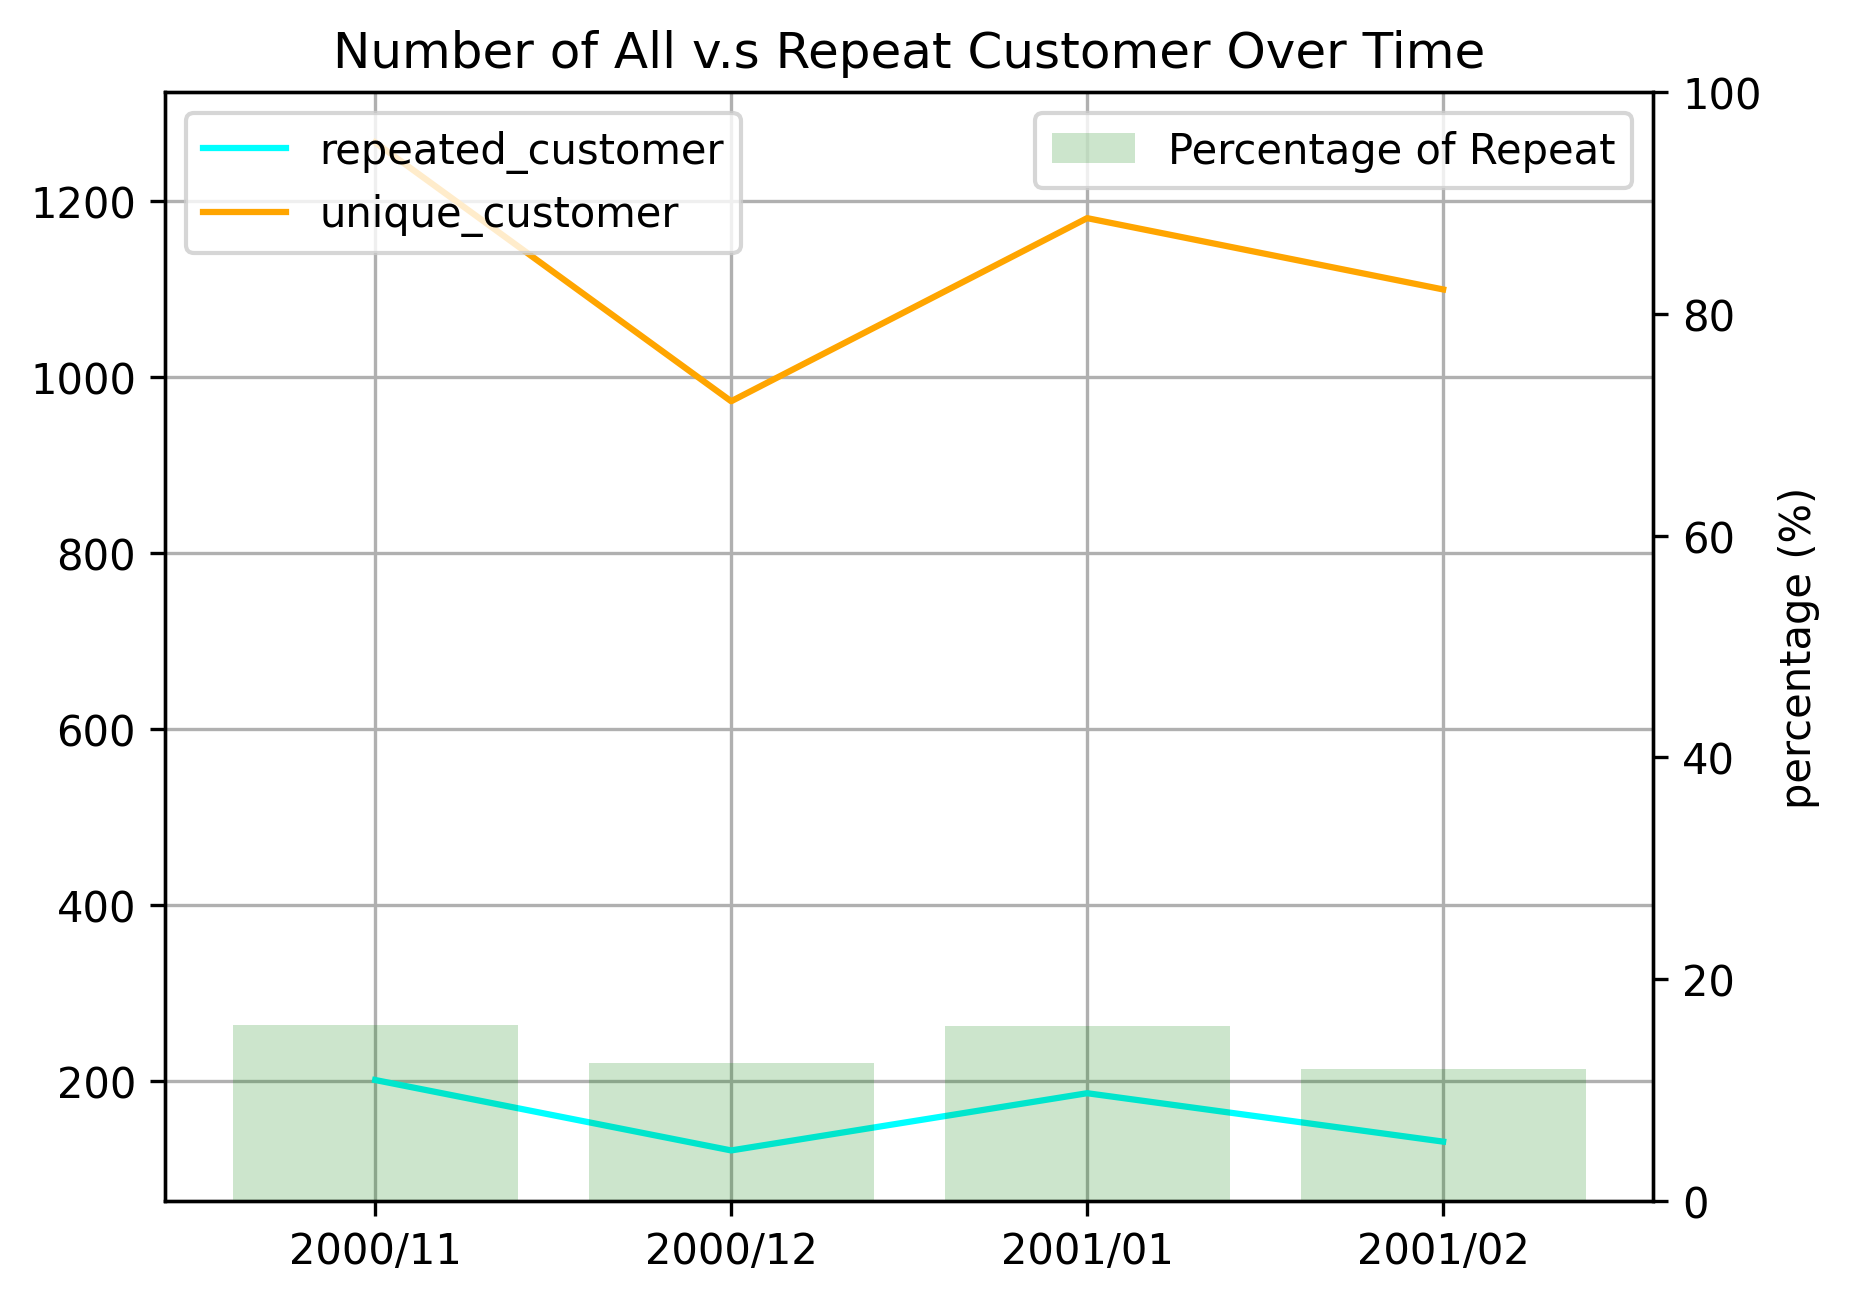

In [36]:
ax = plt.subplot()
ax.set_title("Number of All v.s Repeat Customer Over Time")

plt.grid()

x_labels = [x.strftime('%Y/%m') for x in monthly_repeated_customer_df.index]

ax.plot(x_labels, monthly_repeated_customer_df, label="Repeated Customers", color="cyan")
ax.plot(x_labels, monthly_unique_customers_df, label="All Customers", color="orange")
ax.legend(["repeated_customer", "unique_customer"], loc="upper left")

ax2 = ax.twinx()
ax2.bar(x_labels, monthly_repeated_percentage_df.mul(100), alpha=0.2, color="green")
ax2.set_ylabel('percentage (%)')
ax2.legend(['Percentage of Repeat'])
ax2.set_ylim([0, 100])

plt.show()

## Part 5

請計算前五項「銷售金額最高」商品隨著月時間的成長數，並以折線圖畫出

In [37]:
top5_product_df = df.groupby("PRODUCT_ID")["SALES_FIGURE"].sum().nlargest(5)

top5_product_df

PRODUCT_ID
4710088411785    28410
4719864060018    19960
4710085104116    12346
20512996         10944
4711360162111    10880
Name: SALES_FIGURE, dtype: int64

In [38]:
top5_time_series_sales_count = df.groupby(
    ["PRODUCT_ID", pd.Grouper(key="TRANSACTION_DT", freq="ME")]
)["SALES_FIGURE"].sum().loc[top5_product_df.index]

top5_time_series_sales_count

PRODUCT_ID     TRANSACTION_DT
4710088411785  2000-11-30          120
               2001-01-31         1020
               2001-02-28        27270
4719864060018  2000-12-31        19960
4710085104116  2000-11-30        12180
               2000-12-31           87
               2001-01-31           79
20512996       2000-12-31        10944
4711360162111  2001-01-31        10880
Name: SALES_FIGURE, dtype: int64

<Axes: xlabel='TRANSACTION_DT'>

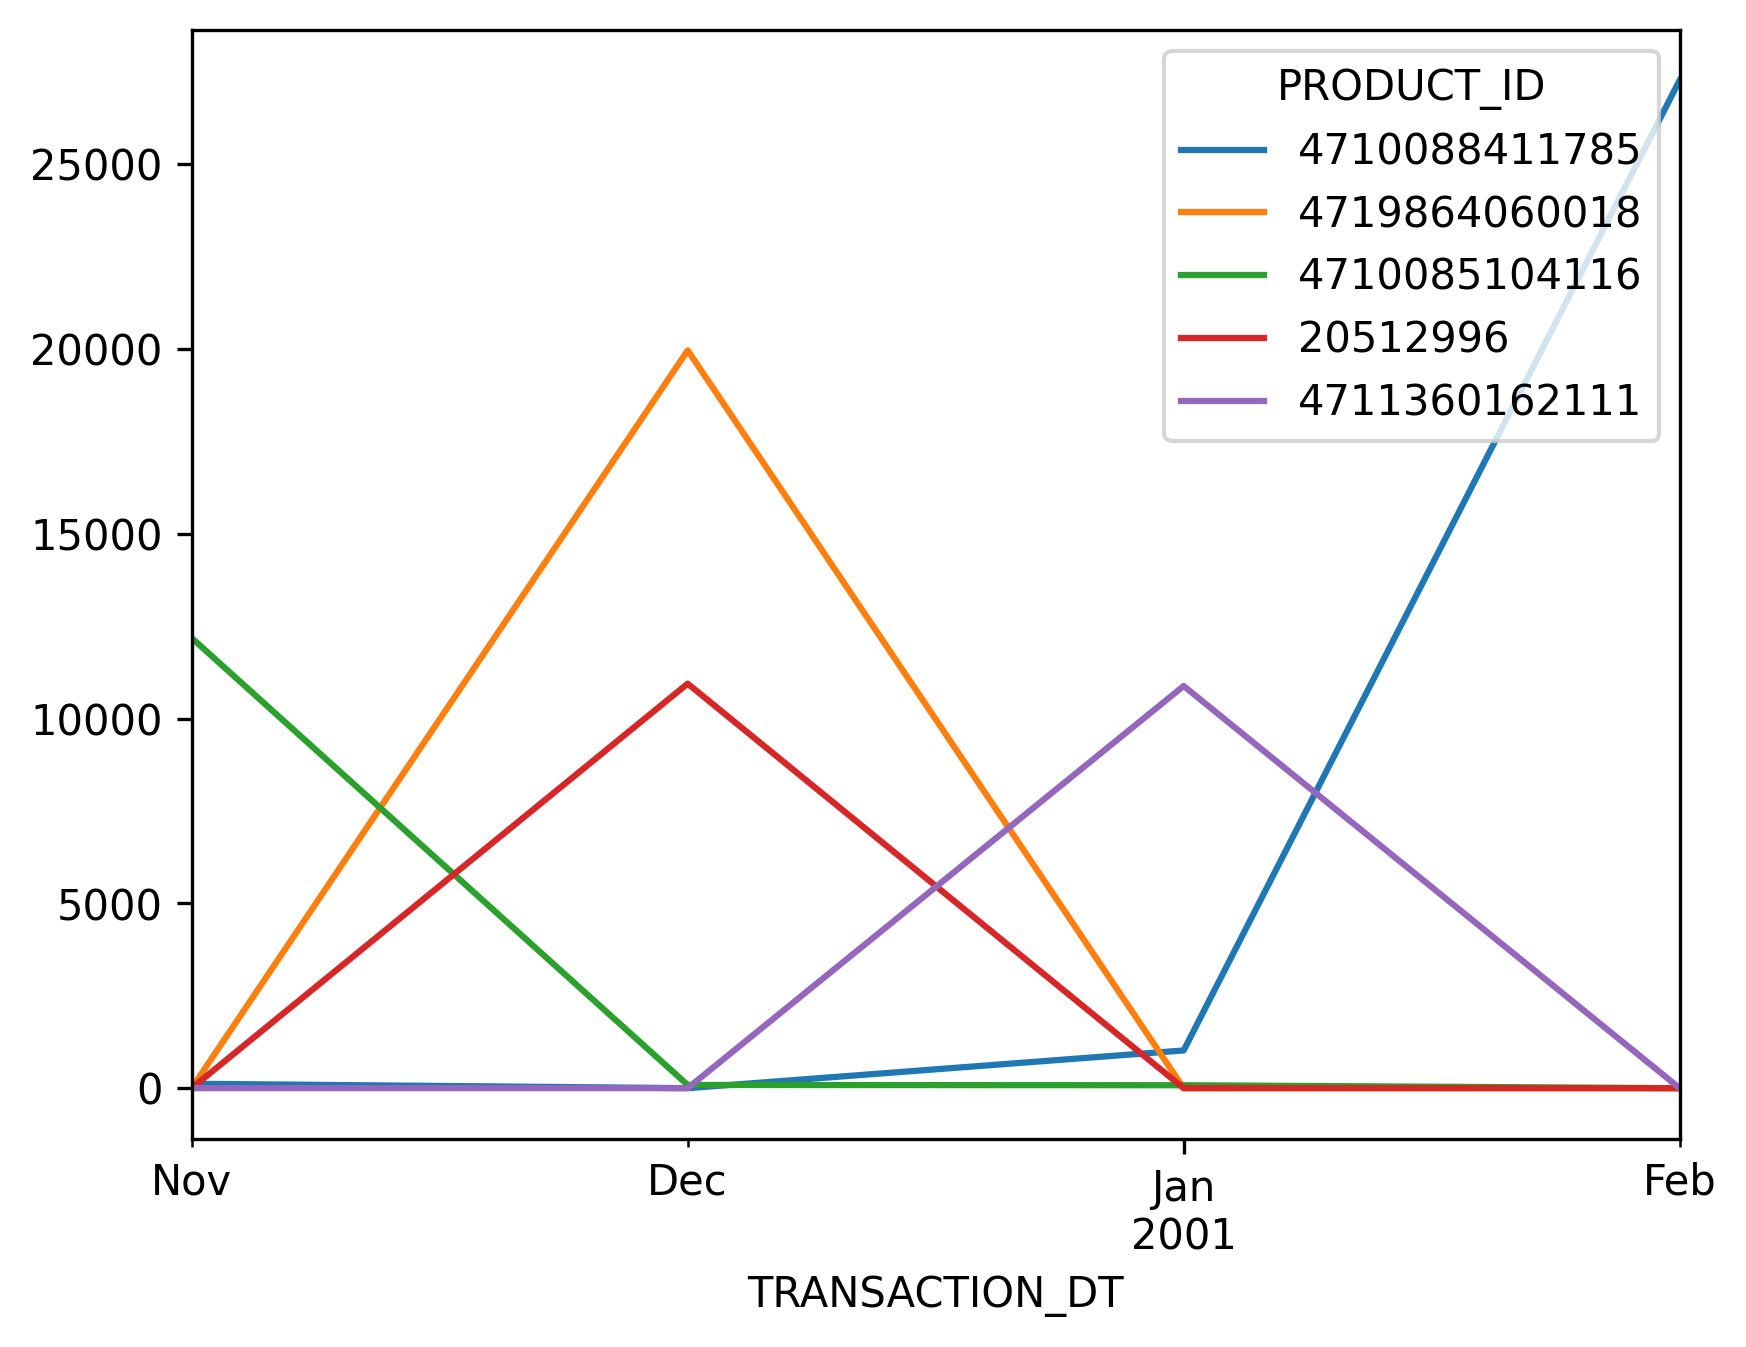

In [39]:
top5_time_series_sales_count.unstack(fill_value=0).T.plot()

## Part 6

計算每位顧客的銷售額（最小值、最大值、總和、平均值）以及購買時間相關資料（最小值、最大值、購買時長、購買頻率）。 

In [40]:
customers_sales = df.groupby("CUSTOMER_ID")["SALES_FIGURE"].agg(
    [("buy_min", "min"), ("buy_max", "max"), ("buy_sum", "sum"), ("buy_mean", "mean")])
customers_sales

,buy_min,buy_max,buy_sum,buy_mean
CUSTOMER_ID,,,,
7795,21,242,263,131.5
13697,79,79,79,79.0
18173,85,85,85,85.0
19897,222,222,222,222.0
20220,20,58,78,39.0
...,...,...,...,...
2177267,49,49,49,49.0
2178448,115,115,115,115.0
2179230,29,29,29,29.0


In [41]:
customers_purchase_period = df.groupby("CUSTOMER_ID")["TRANSACTION_DT"].agg(
    ["min", "max", ("interval", lambda v: v.max() - v.min()), ("frequency", "count")])

customers_purchase_period

,min,max,interval,frequency
CUSTOMER_ID,,,,
7795,2000-11-29,2000-11-29,0 days,2
13697,2000-12-11,2000-12-11,0 days,1
18173,2001-02-20,2001-02-20,0 days,1
19897,2000-12-20,2000-12-20,0 days,1
20220,2000-11-12,2000-11-13,1 days,2
...,...,...,...,...
2177267,2001-02-18,2001-02-18,0 days,1
2178448,2001-02-24,2001-02-24,0 days,1
2179230,2001-02-27,2001-02-27,0 days,1


In [42]:
customers_stats = pd.concat([customers_sales, customers_purchase_period], axis=1)

customers_stats

,buy_min,buy_max,buy_sum,buy_mean,min,max,interval,frequency
CUSTOMER_ID,,,,,,,,
7795,21,242,263,131.5,2000-11-29,2000-11-29,0 days,2
13697,79,79,79,79.0,2000-12-11,2000-12-11,0 days,1
18173,85,85,85,85.0,2001-02-20,2001-02-20,0 days,1
19897,222,222,222,222.0,2000-12-20,2000-12-20,0 days,1
20220,20,58,78,39.0,2000-11-12,2000-11-13,1 days,2
...,...,...,...,...,...,...,...,...
2177267,49,49,49,49.0,2001-02-18,2001-02-18,0 days,1
2178448,115,115,115,115.0,2001-02-24,2001-02-24,0 days,1
2179230,29,29,29,29.0,2001-02-27,2001-02-27,0 days,1


## Part 7

畫出顧客購買次數分佈圖 (長條圖)。 


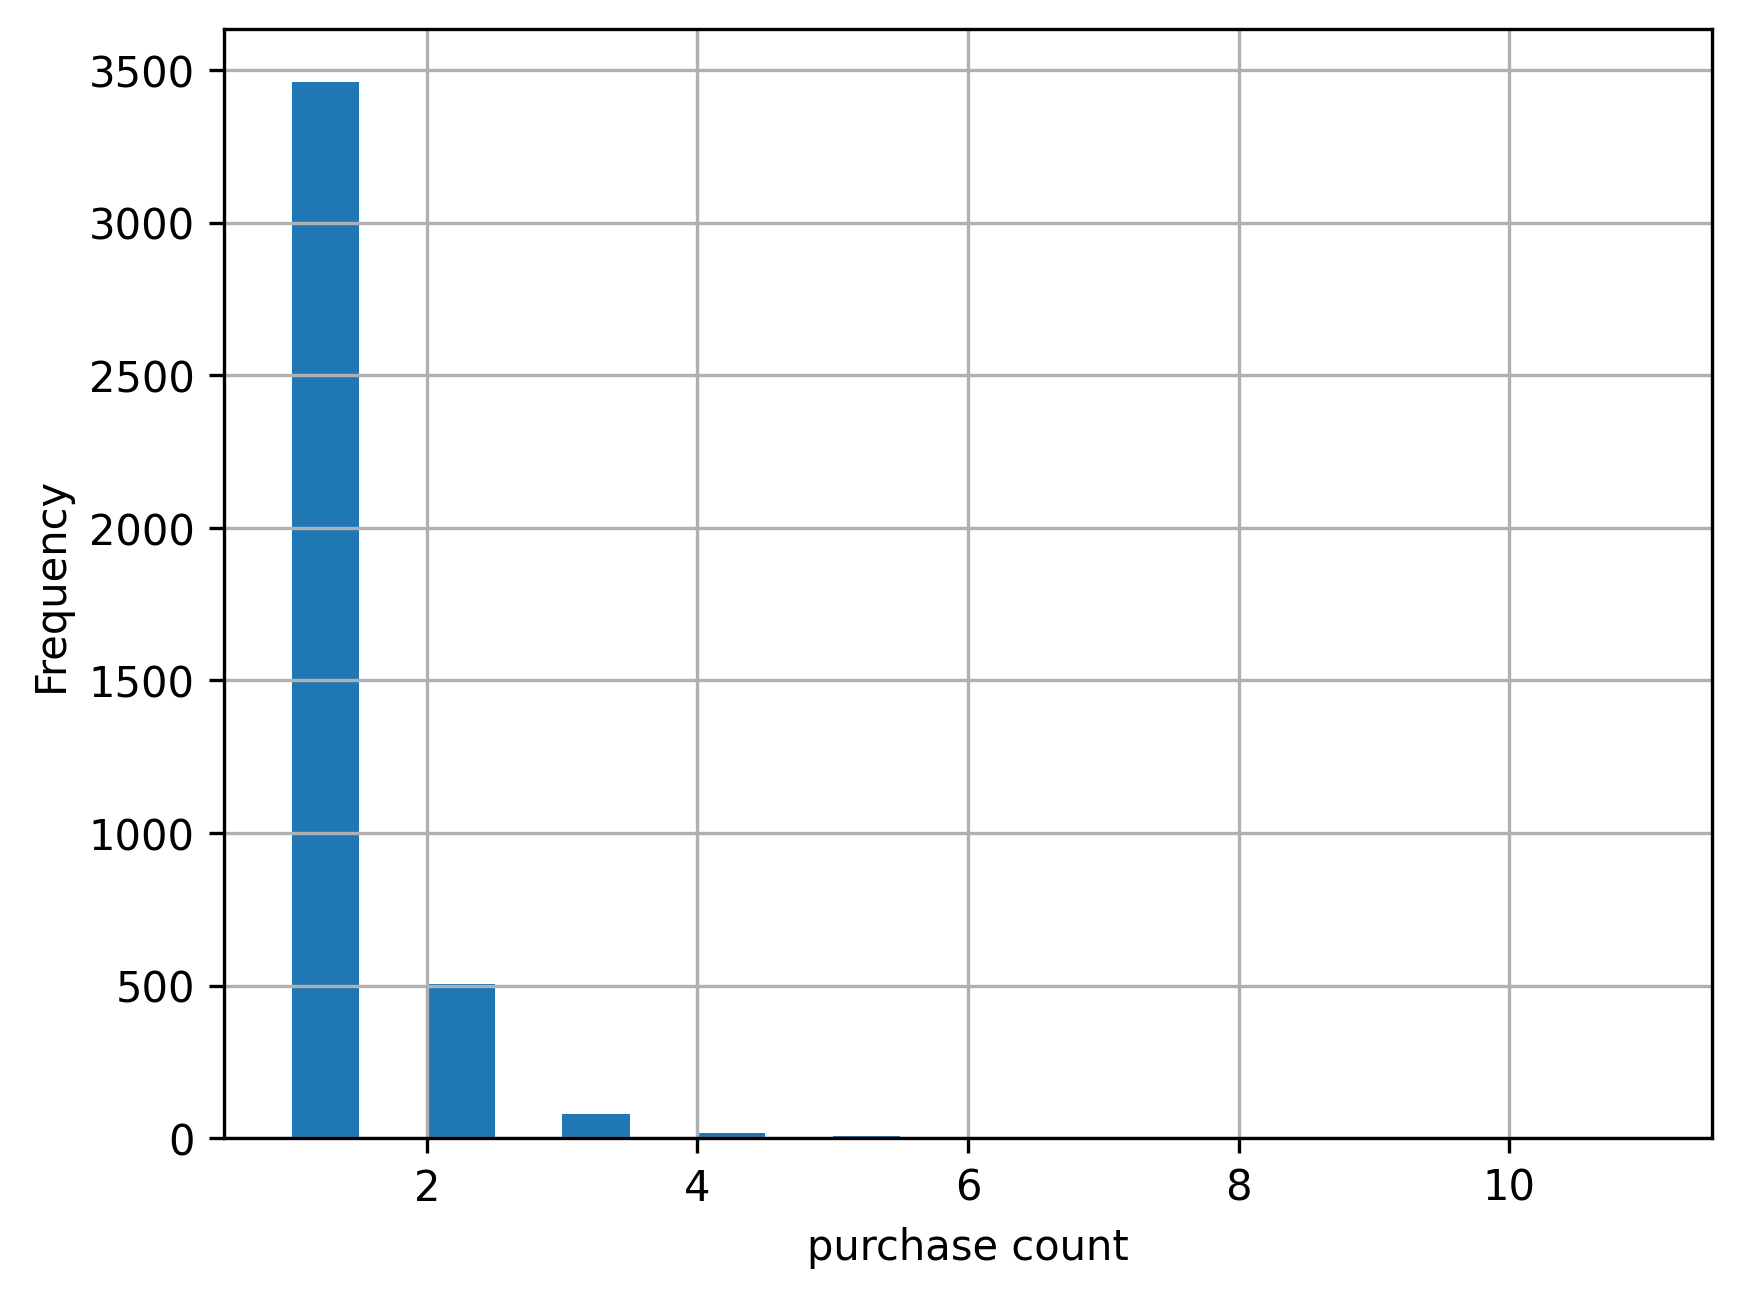

In [43]:
customers_stats["frequency"].plot(kind="hist", bins=20, grid=True, xlabel="purchase count")
plt.show()

## Part 8

畫出平均下單間隔時間分佈圖。

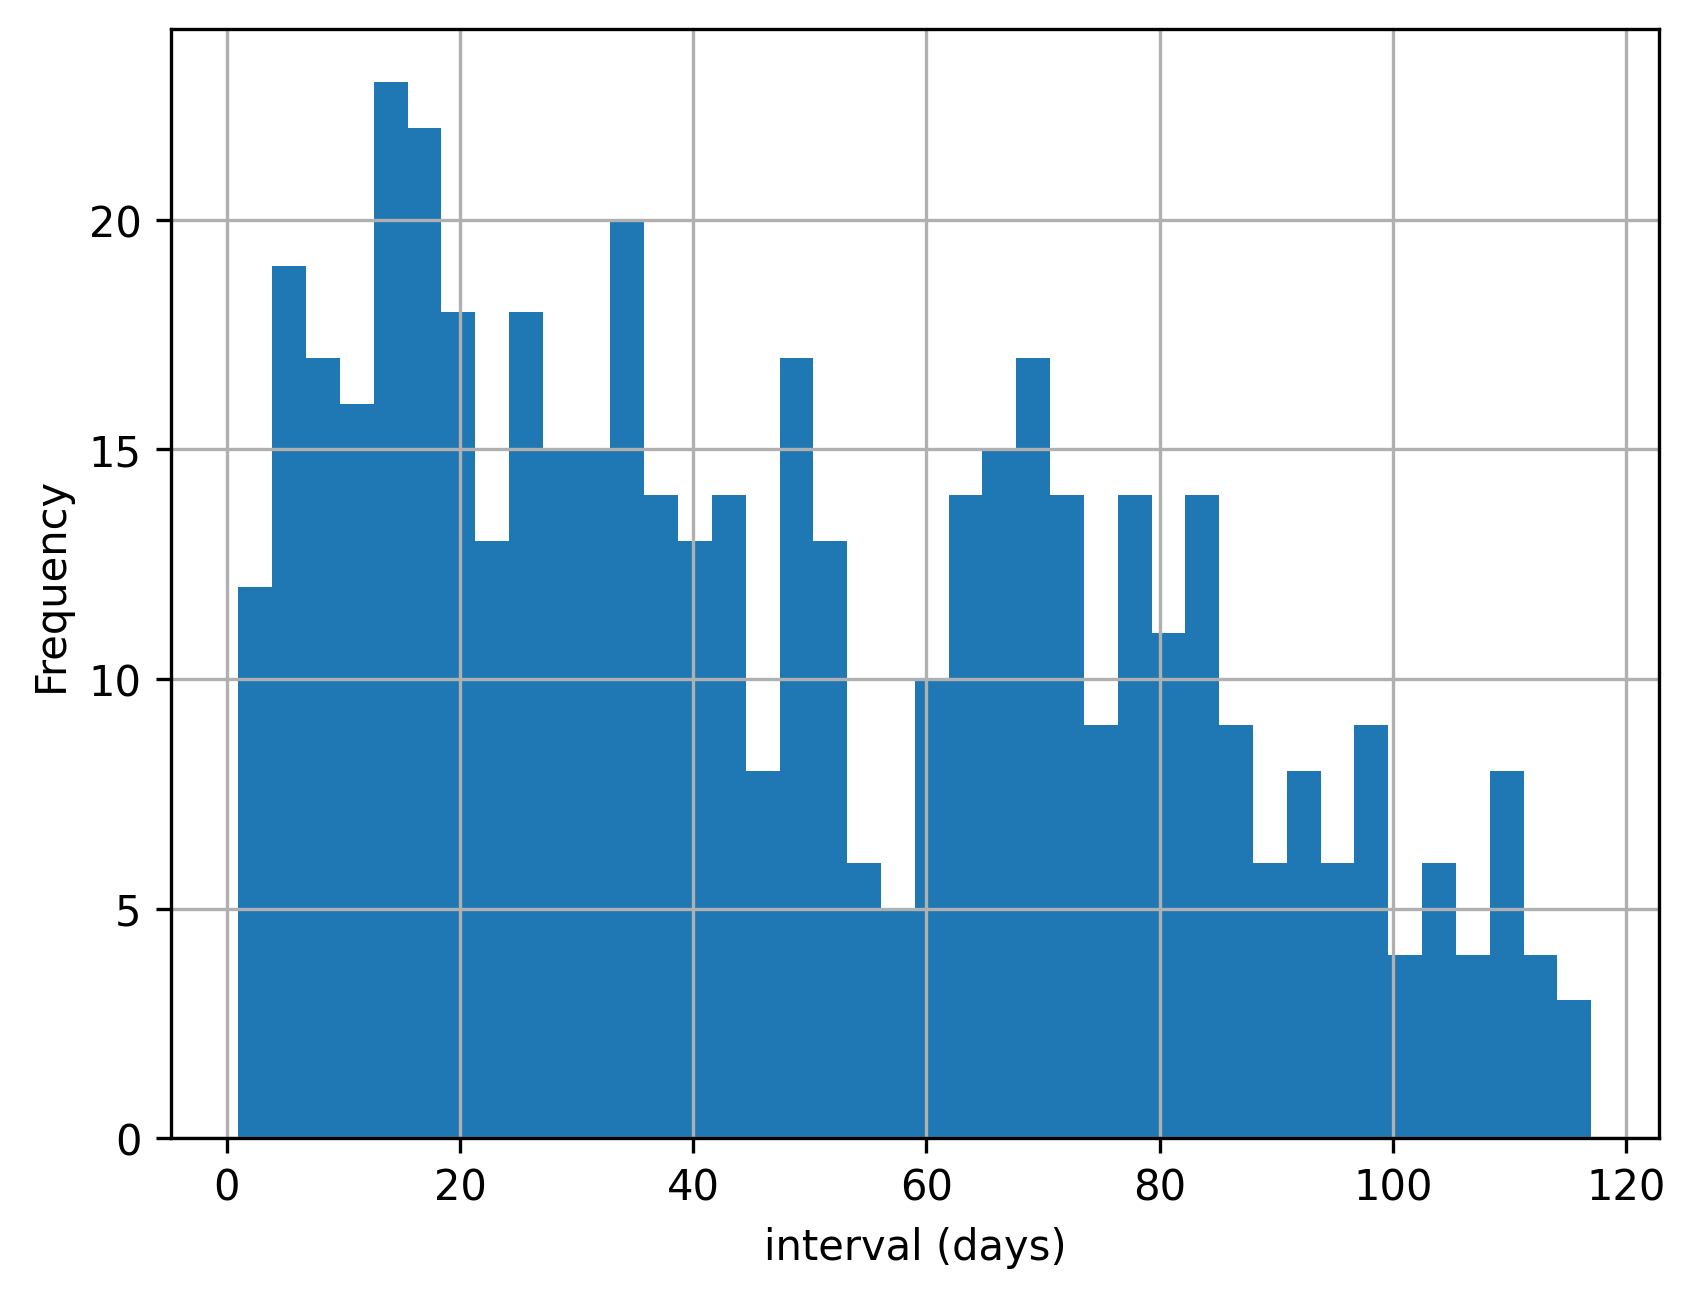

In [44]:
customers_stats[customers_stats["interval"].dt.days > 0]["interval"].dt.days.plot(xlabel="interval (days)", kind="hist",
                                                                                  bins=40, grid=True)
plt.show()